# Projecte Final - UCI ML Drug Review dataset



## EL CONJUNT DE DADES (Drug Review dataset)

- El conjunt de dades escollit es el "UCI ML Drug Review dataset" publicat a Kaggle. El conjunt de dades proporciona les     resenyes de pacients sobre el efecte de fàrmacs prescripts per una determinada afecció. Tambè inclou una valoració de 0 a   10 sobre la satisfacció general del pacient i el  nombre d'usuaris que vanc onsiderar útil la resenya.El conjunt de dades   està ja dividit en un conjunt d'etrenament i en un de proves els qual els ajuntarem per fer una analisis exploratori    inicial


    
## CARACTERISTIQUES GENERALS:

* ***Tipologia***:
  - El conjunt de dades combina tant dades qualitatives ( reviews, conditions ) com quantitatives ( usefulcount, rating,usefulcount). 
  - Nombre d'atributs: 6
  - Nombre de ressenyes 206461
  - Son dades sense procesar que es van obtenir rastrejant dades de resenyes en linea publicadees per webs d'empreses           farmaceutiques  
  
* ***Sector:***
    - Medic/farmaceutic
    . 
* ***Tipus de dades:***
    - El conjunt consisteix en una serie de variables numèrics i de text

* ***Font:***
    - Surya Kallumadi
    - Kansas State University
    - Manhattan, Kansas, USA
    - surya '@' ksu.edu
  
  
* ***Aquestes dades es van publicar en un estudi sobre l'analisi de sentiments sobre l'experiencia de fàrmacs en múltiples facetes, com per exemple sentiments apresos sobre aspectes específics com  l'eficacia i els efectes secundaris.***

* ***Reconeixements:***
 * El conjunt de dades es va publicar originalment al repositori d'aprenentatge automàtic de la UCI. 
 * Citació:
     -Felix Gräßer, Surya Kallumadi, Hagen Malberg i Sebastian Zaunseder. 2018. Anàlisi de sentiments basat en aspectes de revisions de fàrmacs aplicant aprenentatge entre dominis i dades creuades. A Proceedings of the 2018 International Conference on Digital Health (DH '18). ACM, Nova York, NY, EUA, 121-125.
     
    -Quan utilitzeu aquest conjunt de dades, accepteu que:

        - Utilitzeu les dades només amb finalitats de recerca
        - No utilitzeu les dades amb finalitats comercials
        - No distribuïu les dades a ningú més
    
## DEFINICIO DE VARIABLES
* Atributs
    - drugName (categòrica): Nom del medicament/s
    - condition (categorical): Nom de l'afecció
    - review (text): Resenya del pacient
    - rating (numerica): Evaluació del pacient 1-10
    - date (data): Data en que es va efectuar la resenya.
    - usefulCount (numerica): Nombre d'usuaris que van considerar util la resenya


    
## OBECTIUS

* Analisi exploratoria i Visualització de dades.
    - Farem una exploració bàsica per identificar valor i prepocssar algunes variables de cara a facilitar la fase de visualització i processament de daes i poder obtenir axí un millors resultats
    
* Analisis de sentiment.
    - Analitzarem el sentiments de les resenyes i veurem la correlació amb el rating
    
* Aplicació del model SGDClassifier al conjunt de dades Reviews/Conditions
    - Veurem si podem predir la afecció a partir de les resenyes
    
    


# UCI ML Drug Review dataset
* ***Revisions dels pacients sobre medicaments específics juntament amb les afeccions relacionades i una qualificació de pacients de 10 estrelles que reflecteix la satisfacció general del pacient.***
* ***A kagle ja tenim una partició de train & test, el que farem per fer el anàlisis exploratori de dades es unir els dos conjunts de dades en un de sol***

In [138]:
#Importem les llibreries
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
#from scipy.stats import shapiro
#from sklearn.decomposition import PCA
%matplotlib inline

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro

pd.options.display.max_columns=None
pd.options.display.max_rows=30


## Analisi Exploratoria

* Ajuntem els conjunts d'entrenament i test per fer una analisis exploratòria

In [139]:
farmacsReviewTrainDf=pd.read_csv('drugsComTrain_raw.csv',sep=',',encoding='utf8')
farmacsReviewTrainDf['trainTest']=True
farmacsReviewTestDf=pd.read_csv('drugsComTest_raw.csv',sep=',',encoding='utf8')
farmacsReviewTestDf['trainTest']=False
#creem un nou datafframe amb totes les dades
farmacsReviewAllDf = pd.concat([farmacsReviewTrainDf, farmacsReviewTestDf],           
                      sort = False,ignore_index=True)

In [140]:
farmacsReviewTrainDf.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [141]:

farmacsReviewTestDf.describe()

,uniqueID,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [142]:
farmacsReviewAllDf.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [143]:
farmacsReviewAllDf.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,trainTest
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,True
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,True
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,True
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,True
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,True
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,True
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,True
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,True
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11,True
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,True


* Convertim els tipus de dades perque s'ajustin millor al seu tipus real

In [144]:
farmacsReviewAllDf.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
trainTest        bool
dtype: object

* Pasem el nom dels medicaments i afeccions a minuscules i treiem espais superfluos

In [145]:
farmacsReviewAllDf['drugName']=farmacsReviewAllDf['drugName'].str.lower()
farmacsReviewAllDf['drugName'] = farmacsReviewAllDf[['drugName']].apply(lambda x: x.str.strip())



In [146]:
farmacsReviewAllDf['condition']=farmacsReviewAllDf['condition'].str.lower()
farmacsReviewAllDf['condition'] = farmacsReviewAllDf[['condition']].apply(lambda x: x.str.strip())

* separem date en dia , mes i any per posteriors analisis exploratoris i visualitzacions

In [147]:
farmacsReviewAllDf.date = pd.to_datetime(farmacsReviewAllDf['date'])

In [148]:
farmacsReviewAllDf["day"] = farmacsReviewAllDf['date'].map(lambda x: x.day)
farmacsReviewAllDf["month"] = farmacsReviewAllDf['date'].map(lambda x: x.month)
farmacsReviewAllDf["year"] = farmacsReviewAllDf['date'].map(lambda x: x.year)

* Convertim el tipus de dades al tipus que millor s'adapta a cada atribut

In [149]:
farmacsReviewAllDf.drugName   = farmacsReviewAllDf.drugName.astype('string')
farmacsReviewAllDf.condition  = farmacsReviewAllDf.condition.astype('string')
farmacsReviewAllDf.review     = farmacsReviewAllDf.review.astype('string')    
farmacsReviewAllDf.usefulCount= farmacsReviewAllDf.usefulCount.astype('int32')   
farmacsReviewAllDf.rating     = farmacsReviewAllDf.rating.astype('int32')  
farmacsReviewAllDf.day     = farmacsReviewAllDf.day.astype('int32') 
farmacsReviewAllDf.month     = farmacsReviewAllDf.month.astype('int32') 
farmacsReviewAllDf.year     = farmacsReviewAllDf.year.astype('int32')  

In [150]:
farmacsReviewAllDf.dtypes

uniqueID                int64
drugName               string
condition              string
review                 string
rating                  int32
date           datetime64[ns]
usefulCount             int32
trainTest                bool
day                     int32
month                   int32
year                    int32
dtype: object

In [32]:
# checking if the data contains any NULL values

farmacsReviewAllDf.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
trainTest      False
day            False
month          False
year           False
dtype: bool

In [152]:
filesNan = farmacsReviewAllDf[farmacsReviewAllDf.isnull().any(1)]

In [153]:
filesNan

,uniqueID,drugName,condition,review,rating,date,usefulCount,trainTest,day,month,year
30,51452,azithromycin,<NA>,"""Very good response. It is so useful for me. """,10,2010-08-18,1,True,18,8,2010
148,61073,urea,<NA>,"""Accurate information.""",10,2011-07-02,13,True,2,7,2011
488,132651,doxepin,<NA>,"""So far so good. Good for me and I can take it...",10,2010-10-20,25,True,20,10,2010
733,44297,ethinyl estradiol / norgestimate,<NA>,"""I haven&#039;t been on it for a long time and...",8,2011-01-24,1,True,24,1,2011
851,68697,medroxyprogesterone,<NA>,"""I started the shot in July 2015 and ended in ...",6,2017-03-23,1,True,23,3,2017
...,...,...,...,...,...,...,...,...,...,...,...
213721,170508,quetiapine,<NA>,"""good for insomnia most of the time""",7,2015-05-27,10,False,27,5,2015
213785,104629,ethinyl estradiol / levonorgestrel,<NA>,"""I am almost on my third month of my first pac...",5,2011-04-25,4,False,25,4,2011
213914,104642,ethinyl estradiol / levonorgestrel,<NA>,"""I have been taking this birth control for two...",10,2011-01-11,1,False,11,1,2011
214039,720,medroxyprogesterone,<NA>,"""I have been using the shot for 7 years now an...",10,2011-04-21,1,False,21,4,2011


* comprovem files duplicades
    -Condirem duplciada si els camps review , condiition, drugname i date son iguals

In [154]:
farmacsReviewAllDf.sort_values(['review','condition','drugName','date'], inplace = True) 
  
bool_series = farmacsReviewAllDf.duplicated(subset=['review','condition','drugName','rating','date']) 
  
farmacsReviewAllDf.head() 
  
farmacsReviewAllDf[bool_series] 


,uniqueID,drugName,condition,review,rating,date,usefulCount,trainTest,day,month,year
132217,152964,doxycycline,bacterial infection,"""10-15 minutes after taking this I got a reall...",1,2017-01-02,19,True,2,1,2017
135137,61305,citalopram,anxiety and stress,"""Celexa is my miracle drug! I&#039;m on the g...",10,2017-11-18,9,True,18,11,2017
177691,1816,zolmitriptan,migraine,"""Fantastic. I use to suffer with nasty migrane...",9,2008-03-21,7,False,21,3,2008
148419,231418,trazodone,insomnia,"""For anxiety and insomnia was amazed by its ef...",10,2016-09-17,17,True,17,9,2016
158494,146929,alprazolam,anxiety,"""For several years I have been prescribed 1mg ...",10,2016-06-22,59,True,22,6,2016
...,...,...,...,...,...,...,...,...,...,...,...
157500,203273,blisovi 24 fe,birth control,"""Was on Junel Fe and it worked according to my...",1,2016-12-06,4,True,6,12,2016
105971,15598,ethinyl estradiol / norethindrone,birth control,"""Was on Junel Fe and it worked according to my...",1,2016-12-06,4,True,6,12,2016
109231,172829,clonazepam,panic disorde,"""Works Amazingly!""",10,2014-10-26,46,True,26,10,2014
208522,129517,levonorgestrel,emergency contraception,"""me and my boyfriend were having sex and the c...",10,2015-08-04,17,False,4,8,2015


In [155]:
farmacsReviewAllDf.drop_duplicates(subset=['review','condition','drugName','rating','date'],inplace=True)

*Les conditions "not listed/others i les que comencen per span ja que no aporten res en quant a la condition, pero podrien ser de utilitat per saber dir el rating del fàrmac o si s'ha trobat util. Canviarem la ccondition a totes aquestes files a "No determinada"


In [156]:
notListedOtherSpan = ((farmacsReviewAllDf.condition.str.contains('not listed')) |   
                  (farmacsReviewAllDf.condition.str.contains('span>')) |
                  (farmacsReviewAllDf.condition.isnull()) )                                                       
 
farmacsReviewAllDf[notListedOtherSpan]
                        
#farmacsReviewAllDf.drop(farmacsReviewAllDf[notListedOtherSpan].index, inplace = True)

,uniqueID,drugName,condition,review,rating,date,usefulCount,trainTest,day,month,year
64876,139103,phentermine,not listed / othe,"""01/19/09 I weighed 312lb. 1/30/2009 I now wei...",9,2009-01-30,1,True,30,1,2009
167297,28848,lexapro,1</span> users found this comment helpful.,"""16 female. I&#039;ve been under the care of a...",3,2009-09-28,1,False,28,9,2009
127841,141960,escitalopram,<NA>,"""16 female. I&#039;ve been under the care of a...",3,2009-09-28,1,True,28,9,2009
205770,26714,sprintec,3</span> users found this comment helpful.,"""18 years old, taken for one year due to a sev...",9,2010-08-16,3,False,16,8,2010
194353,44388,ethinyl estradiol / norgestimate,<NA>,"""18 years old, taken for one year due to a sev...",9,2010-08-16,3,False,16,8,2010
...,...,...,...,...,...,...,...,...,...,...,...
187768,72532,tramadol,<NA>,"""ultram is the only drug ive had that relieved...",10,2010-02-22,21,False,22,2,2010
205648,30466,klonopin,12</span> users found this comment helpful.,"""used primarely for anxiety and sleep. Worked...",5,2008-03-19,12,False,19,3,2008
90516,173400,clonazepam,<NA>,"""used primarely for anxiety and sleep. Worked...",5,2008-03-19,12,True,19,3,2008
34341,198083,metoprolol,not listed / othe,"""very useful information, thanks a lot""",10,2010-03-15,3,True,15,3,2010


In [157]:
farmacsReviewAllDf.loc[notListedOtherSpan, 'condition'] = "no diagnosticat"


In [158]:
farmacsReviewAllDf[notListedOtherSpan]

,uniqueID,drugName,condition,review,rating,date,usefulCount,trainTest,day,month,year
64876,139103,phentermine,no diagnosticat,"""01/19/09 I weighed 312lb. 1/30/2009 I now wei...",9,2009-01-30,1,True,30,1,2009
167297,28848,lexapro,no diagnosticat,"""16 female. I&#039;ve been under the care of a...",3,2009-09-28,1,False,28,9,2009
127841,141960,escitalopram,no diagnosticat,"""16 female. I&#039;ve been under the care of a...",3,2009-09-28,1,True,28,9,2009
205770,26714,sprintec,no diagnosticat,"""18 years old, taken for one year due to a sev...",9,2010-08-16,3,False,16,8,2010
194353,44388,ethinyl estradiol / norgestimate,no diagnosticat,"""18 years old, taken for one year due to a sev...",9,2010-08-16,3,False,16,8,2010
...,...,...,...,...,...,...,...,...,...,...,...
187768,72532,tramadol,no diagnosticat,"""ultram is the only drug ive had that relieved...",10,2010-02-22,21,False,22,2,2010
205648,30466,klonopin,no diagnosticat,"""used primarely for anxiety and sleep. Worked...",5,2008-03-19,12,False,19,3,2008
90516,173400,clonazepam,no diagnosticat,"""used primarely for anxiety and sleep. Worked...",5,2008-03-19,12,True,19,3,2008
34341,198083,metoprolol,no diagnosticat,"""very useful information, thanks a lot""",10,2010-03-15,3,True,15,3,2010


* ***Verifiquen quantes afeccions diferents hi ha i quantes reviews  per cadesscuna***

In [159]:
conditionRank= (farmacsReviewAllDf 
  .groupby("condition")
  .agg(frequency=("condition", "count"))
  .sort_values('frequency',ascending=False)
  .reset_index())

In [160]:
totalCond=conditionRank.count()
conditionRank.head(10)

,condition,frequency
0,birth control,38428
1,depression,12163
2,pain,8245
3,anxiety,7808
4,acne,7431
5,bipolar disorde,5601
6,insomnia,4902
7,weight loss,4855
8,obesity,4757
9,adhd,4509


In [161]:
#Quants farmacs o combinacions de farmacs hi ha a la mostra
print(f"Nombre de combinacions de afeccions  diferents son {totalCond}")

Nombre de combinacions de afeccions  diferents son condition    836
frequency    836
dtype: int64


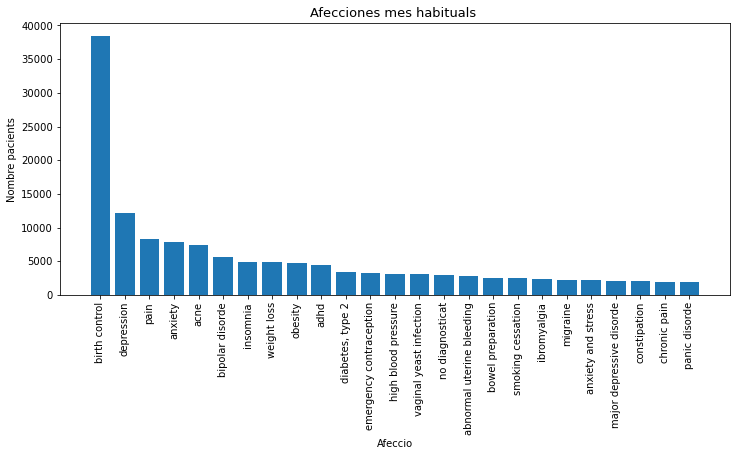

In [162]:
# checking the different types of conditions patients


#farmacsReviewAllDf['condition'].value_counts().head(25).plot.bar(figsize = (12, 5), color = 'purple')

plt.figure(figsize=(12,5)) 
plt.title('Afecciones mes habituals ', fontsize = 13)
plt.xlabel('Afeccio', fontsize = 10)
plt.ylabel('Nombre pacients')
plt.bar( conditionRank['condition'].head(25),conditionRank['frequency'].head(25))
plt.xticks(rotation='vertical')
plt.show()

In [163]:
conditionRank[conditionRank.frequency>13]['condition'].count()

409

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


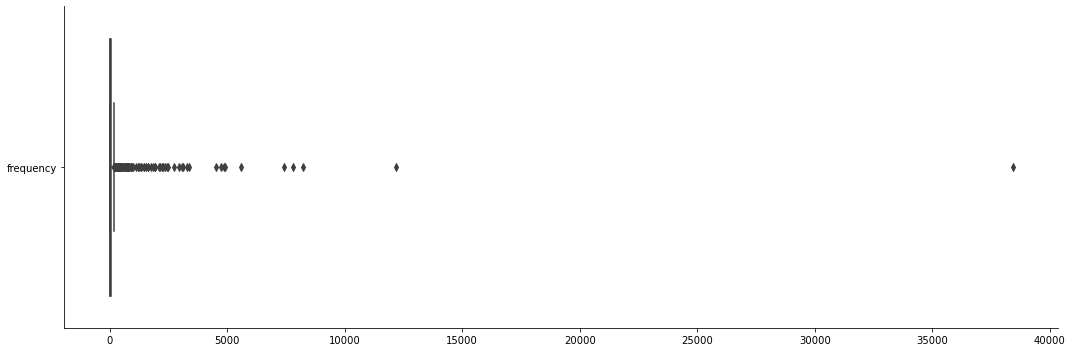

In [164]:

sns.catplot(data = conditionRank, kind = "box", aspect = 3,orient='h',sharey=False);



In [165]:
conditionRank.describe()

,frequency
count,836.000000
mean,257.190191
std,1559.293708
min,1.000000
25%,3.000000
50%,13.000000
75%,80.000000
max,38428.000000


<AxesSubplot:xlabel='frequency', ylabel='Count'>

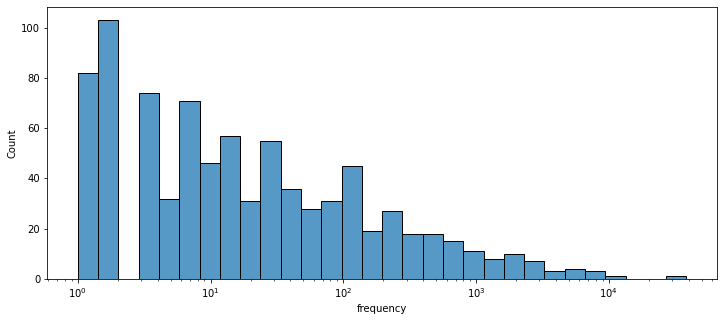

In [166]:
plt.figure(figsize=(12,5)) 
sns.histplot(data=conditionRank, x="frequency", log_scale=True,bins=30)


 * ***Quants medicaments diferents hi ha i quin son els smes presscrits***

In [167]:
drugRank=farmacsReviewAllDf.groupby(['drugName'])['review'].nunique().sort_values(ascending = False)
total=drugRank.count()

In [168]:
#Quants farmacs o combinacions de farmacs hi ha a la mostra
print(f"Nombre de farmacs/combinacions de farmacs receptats  {total}")

Nombre de farmacs/combinacions de farmacs receptats  3671


In [169]:
drugRank.describe()

count    3671.000000
mean       58.547807
std       213.026463
min         1.000000
25%         2.000000
50%         6.000000
75%        30.000000
max      4925.000000
Name: review, dtype: float64

In [170]:
#Top 15 farmacs
drugRank.head(10)

drugName
levonorgestrel                        4925
etonogestrel                          4420
ethinyl estradiol / norethindrone     3752
nexplanon                             2891
ethinyl estradiol / norgestimate      2788
ethinyl estradiol / levonorgestrel    2500
phentermine                           2085
sertraline                            1868
escitalopram                          1744
mirena                                1673
Name: review, dtype: int64

In [171]:
drugRank.tail(10)

drugName
senna s                      1
incobotulinumtoxina          1
imotil                       1
imiglucerase                 1
sensorcaine-mpf              1
iluvien                      1
ifosfamide                   1
ifex                         1
ibudone                      1
a + d cracked skin relief    1
Name: review, dtype: int64

* Anem a separar els farmacs individualment , treure espais i pasar tot a minuscules per tenir la llista de farmacs neta

* **Veiem que hi han combinacions de fàrmacs , anem a separar els farmacs ja que les combinacions solen**
  **estar separades per "/"***
  **Crearem una dataframe per saber el nombre de medicaments diferents***
  * amb uba expresio reguklar separaem els farmacs dins de una fila
  * treiem els espais i pasem tot a minuscules
  * agrupen i sumaritzem

In [172]:
#Covertim llista a Dataframe
df1 = pd.DataFrame(data=drugRank.index, columns=['drugName'])
df2 = pd.DataFrame(data=drugRank.values, columns=['contador'])
drugRankDf = pd.merge(df1, df2, left_index=True, right_index=True)


In [173]:
# Mitjançant una regular expresion separem els diferents medicaments que hi han a la mateixa review
drugRankAllDf = pd.DataFrame(columns=['drugName', 'contador'])
for i in range(len(drugRankDf['drugName'])):    
    listaDrugs=re.findall(r'[A-Za-z\s\-]+[0-9A-Za-z\-\s\.]*[0-9/\s]*', drugRankDf['drugName'][i])
    for word in listaDrugs:
        word1=word.lower().strip()
        if word1[-1]=="/":
            word1=word1[:-1].strip()
        novaFila={'drugName':word1,'contador':drugRankDf['contador'][i]}
        drugRankAllDf=drugRankAllDf.append(novaFila,ignore_index=True)

In [174]:
totalDrug=drugRankAllDf.groupby(['drugName'])[['contador']].sum().sort_values(by=['contador'],ascending = False)


In [175]:
df1 = pd.DataFrame(data=totalDrug.index, columns=['drugName'])
df2 = pd.DataFrame(data=totalDrug.values, columns=['contador'])
totalDrugDf = pd.merge(df1, df2, left_index=True, right_index=True)

In [176]:
#Quants farmacs o combinacions de farmacs hi ha a la mostra

print(f"Nombre de combinacions de farmacs receptats diferents son {totalDrugDf.count()}")

Nombre de combinacions de farmacs receptats diferents son drugName    3506
contador    3506
dtype: int64


In [177]:
print(totalDrugDf.head(20))

               drugName  contador
0     ethinyl estradiol     12709
1        levonorgestrel      7447
2          etonogestrel      5255
3         norethindrone      4335
4             nexplanon      2891
5          norgestimate      2788
6             bupropion      2617
7           phentermine      2579
8         acetaminophen      2012
9            sertraline      1868
10         escitalopram      1744
11               mirena      1673
12           naltrexone      1523
13             implanon      1506
14           gabapentin      1415
15         drospirenone      1400
16           miconazole      1348
17          venlafaxine      1337
18  medroxyprogesterone      1322
19           citalopram      1307


In [178]:
totalDrugDf.tail(10)

,drugName,contador
3496,sudafed pe congestion,1
3497,sudafed pe pressure,1
3498,premsyn pms,1
3499,sular,1
3500,mavik,1
3501,sulfadoxine,1
3502,enemeez mini,1
3503,emoquette,1
3504,mavyret,1
3505,omnitrope,1


In [179]:
totalDrugDf.describe()

,contador
count,3506.000000
mean,69.293212
std,330.936473
min,1.000000
25%,2.000000
50%,6.000000
75%,34.000000
max,12709.000000


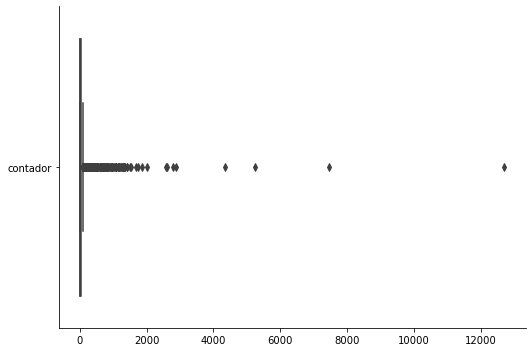

In [180]:
sns.catplot(data = totalDrugDf, kind = "box", aspect = 1.5,orient='h');

* ordenem per nom per veure si encara tenim algun medicament extrany o si hi ha algun nomb que tingui lletres

In [181]:
totalDrugDf.sort_values(by=['drugName'],ascending = True).tail(20)


,drugName,contador
1205,zovirax cream,17
1745,zovirax ointment,6
677,zubsolv,53
2455,zurampic,2
1336,zutripro,13
526,zyban,79
872,zyclara,34
1849,zylet,5
2970,zyloprim,1
1843,zymar,5


## Visualitzacio de dades

* Preparem dades i fen un diagrama de pastis per veure medicaments mes prescripts 

In [182]:
sizes = totalDrugDf['contador']
#labels=totalDrugDf['drugName']
topList=30
labels=[]
j=0
for i in sizes[0:30]:
    label=totalDrugDf.iloc[j,0] + " "+ str(i)
    labels.append(label)
    j=j+1


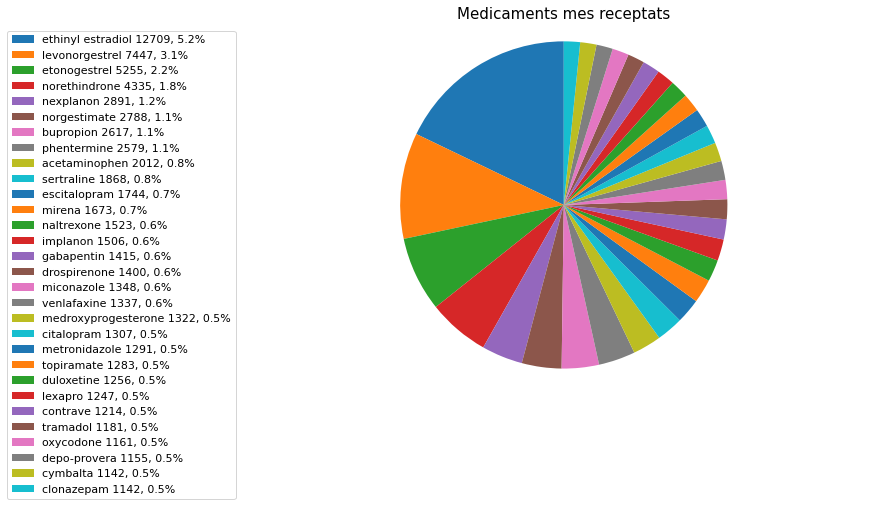

In [183]:

    
fig1, ax1 = plt.subplots(figsize=(12, 5))
fig1.subplots_adjust(0.3,0,1,1)
theme = plt.get_cmap('Paired')
#ax1.set_prop_cycle("color", [theme(1. * i / topList) for i in range(topList)])
_, _ = ax1.pie(sizes[0:30], startangle=90)
ax1.axis('equal')
topList
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels[0:30], sizes[0:30])],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Medicaments mes receptats', fontsize = 15)
plt.show()

***utilitzem wordclous per per confirmar els medicaments mes populars***

In [184]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWords=set(stopwords.words("english"))
stopWordsAdd=[",",":",'"','“','”', '’',]
stopWords.update(stopWordsAdd)
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [233]:
def generaWordCloud(conditionp):
    textNet=" "
    for drug in farmacsReviewAllDf[farmacsReviewAllDf.condition==conditionp]['drugName']:
        listaDrugs=re.findall(r'[A-Za-z\s\-]+[0-9A-Za-z\-\s\.]*[0-9/\s]*', drug)
        for word in listaDrugs:
            word1=word.lower().strip()
            if word1[-1]=="/":
                word1=word1[:-1].strip()
            textNet= textNet +" "+ word1
    return textNet

def dibuixaCloud(conditionp):
    wordcloud = WordCloud(stopwords=stopWords,background_color="white").generate(generaWordCloud(conditionp))
    #wordcloud = WordCloud(stopwords=stopWords, background_color="white").generate(textNet)
    #wordcloud.most_common(20)
    plt.figure(figsize = (12,15))
    plt.title(f'Medicaments mes receptats per {conditionp}', fontsize = 15)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

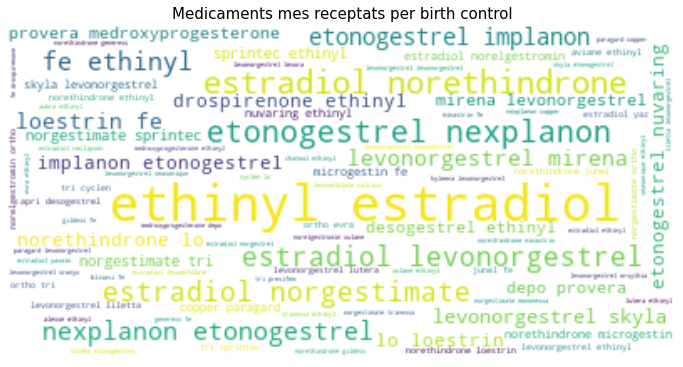

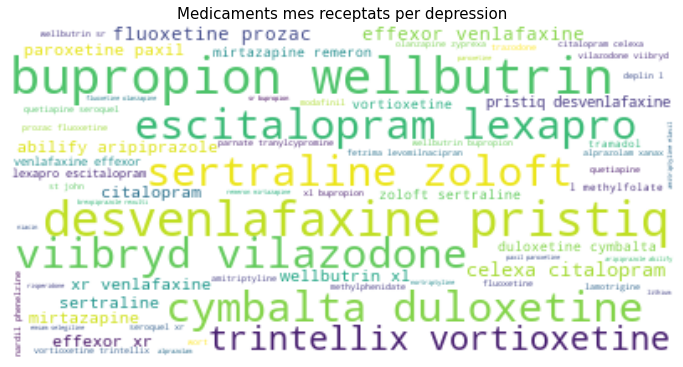

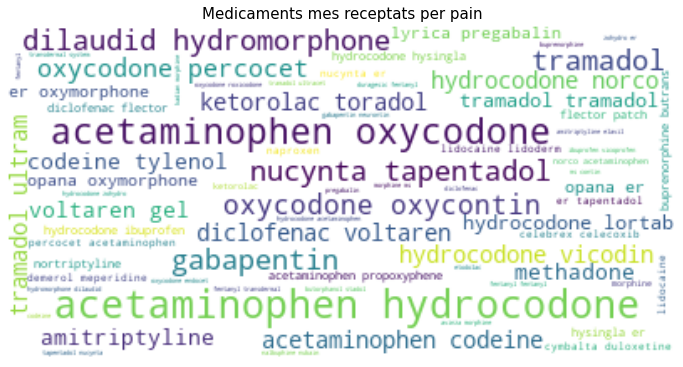

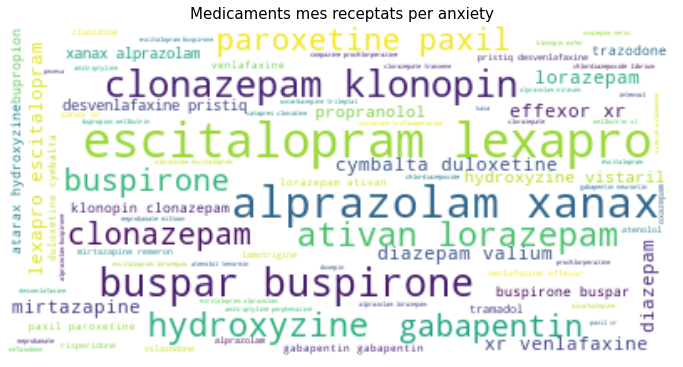

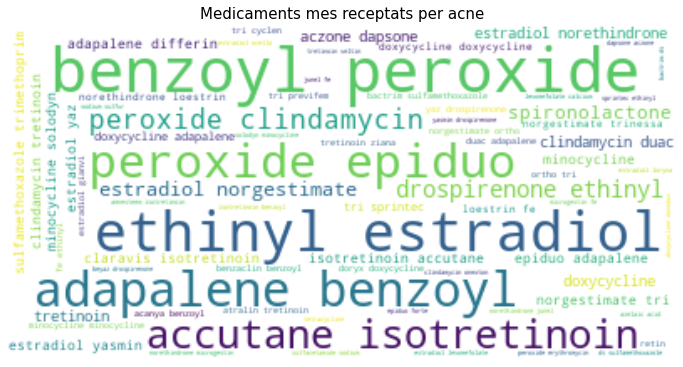

In [235]:
for i in range(5):
    dibuixaCloud(conditionRank.iloc[i]['condition'])

* ***Medicaments mes utilitzats per afecció***

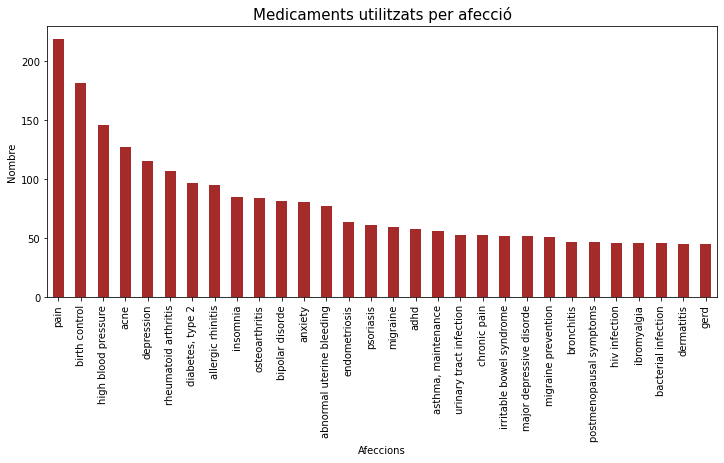

In [186]:
# checking the most popular drugs per conditions
plt.figure(figsize=(12,5)) 
farmacsReviewAllDf[farmacsReviewAllDf.condition!='no diagnosticat'].groupby(['condition'])['drugName'].nunique().sort_values(ascending = False).head(30).plot.bar( color = 'brown')
plt.title('Medicaments utilitzats per afecció', fontsize = 15)
plt.xlabel('Afeccions', fontsize = 10)
plt.ylabel('Nombre')
plt.show()

* ***Medicaments que se utilitzen en multiples afeccions , separant medicaments individuals***

In [187]:
drugCondRankAllDf = pd.DataFrame(columns=['Medicament', 'Afeccio'])
listMed=[]
listCond=[]
for fila in farmacsReviewAllDf.itertuples():
    listaDrugs=re.findall(r'[A-Za-z\s\-]+[0-9A-Za-z\-\s\.]*[0-9/\s]*', fila.drugName)
    for word in listaDrugs:
        word1=word.lower().strip()
        if word1[-1]=="/":
            word1=word1[:-1].strip()
        listMed.append(word1)
        listCond.append(fila.condition)


In [188]:
nouDict={'Medicament':listMed,'Afeccio':listCond}
drugCondRankAllDf = pd.DataFrame(nouDict)

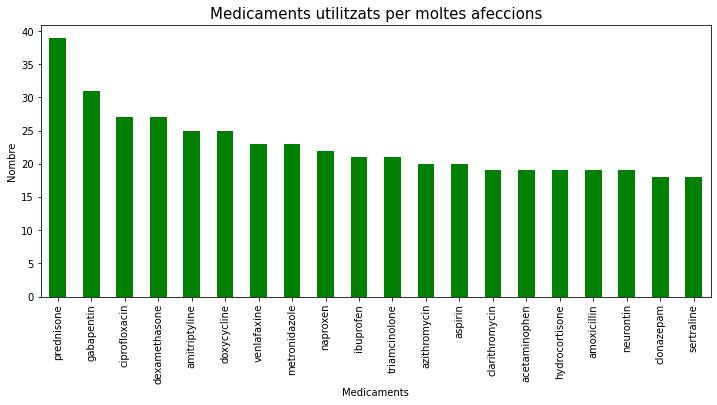

In [189]:

drugCondRankAllDf.groupby(['Medicament'])['Afeccio'].nunique().sort_values(ascending = False).head(20).plot.bar(figsize = (12, 8), color = 'green')
plt.title('Medicaments utilitzats per moltes afeccions', fontsize = 15)
plt.xlabel('Medicaments', fontsize = 10)
plt.ylabel('Nombre')
plt.show()

* ***Afeccions mes habituals***

* ***Anem a veure els medicametns a millor rating en les 6 afeccions  mes habituals***

In [190]:
farmrating=farmacsReviewAllDf[farmacsReviewAllDf.condition.str.contains('Birth Control')].groupby(['drugName'])['rating'].mean().sort_values(ascending = False).head(20)
farmrUseful=farmacsReviewAllDf[farmacsReviewAllDf.condition.str.contains('Birth Control')]['drugName'].value_counts().sort_values(ascending = False).head(20)

width_max = len(farmrating)
height_max = max(s.shape[0] for s in [farmrating, farmrating])

In [318]:
from matplotlib.figure import figaspect
top5Afecccions=farmacsReviewAllDf['condition'].value_counts().head(5)

In [319]:

def medicamentRatingvsUsat(capcua):

    j=0
    maxn = 30
    for afecccio in top5Afecccions.index:
        fig, axs = plt.subplots(1,2,figsize = (12,5))
        axs = axs.ravel()
        plt.suptitle(f"Afecció:{afecccio} - Grau Satisfacció vs Mes utilitzats")
        
        if capcua=='cap':
            sortc=False
        else:
            sortc=True
        seleccio=farmacsReviewAllDf[farmacsReviewAllDf.condition.str.contains(afecccio)]['drugName'].value_counts().sort_values(ascending = sortc).head(30)
        seleccio.plot(kind='bar',ax=axs[0],position = 0, title = 'Nombre de pacients', width=0.3)    
        
        axs[0].set_xlim(-0.5,maxn-0.5)
        j=j+1
        
        filter=(  (farmacsReviewAllDf.condition.str.contains(afecccio)) &   
                  (farmacsReviewAllDf.drugName.isin(seleccio.index)))
        farmacsReviewAllDf[filter].groupby(['drugName'])['rating'].mean().head(30).plot(kind='bar',ax=axs[1],position = 1, title = 'Grau satisfacció ', width=0.3)
            
        #farmacsReviewAllDf[farmacsReviewAllDf.condition.str.contains(afecccio)].groupby(['drugName'])['rating'].mean().sort_values(ascending = sortc).head(30).plot(kind='bar',ax=axs[0],position = 0, title = 'Grau satisfacció ', width=0.3)
        axs[1].set_xlim(-0.5,maxn-0.5) 
        axs[1].set_xticklabels(seleccio.index)
        #axs[1].tick_params(axis='x', rotation=45)
        j=j+1
        fig.tight_layout()
        plt.show()

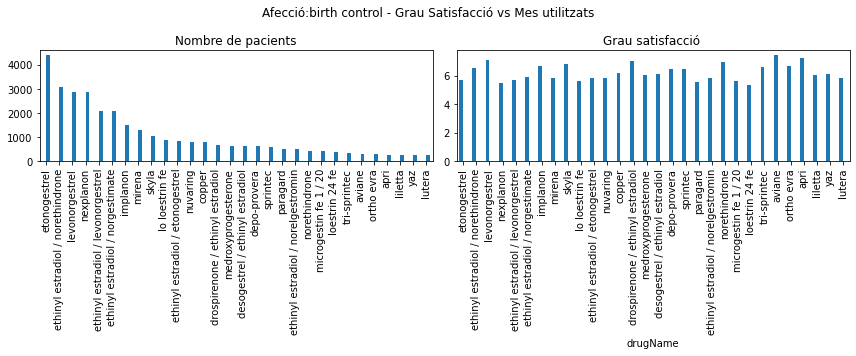

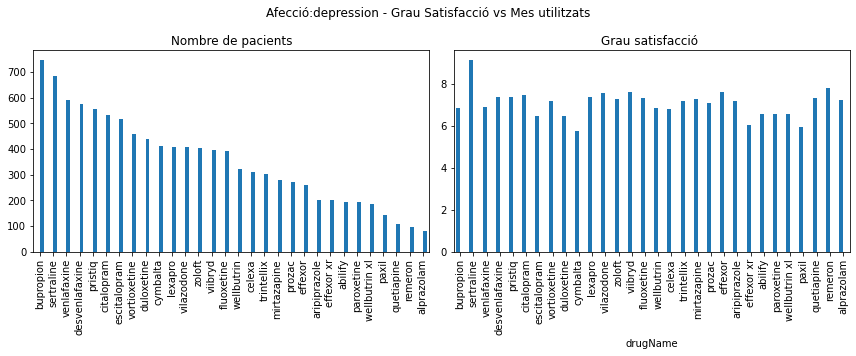

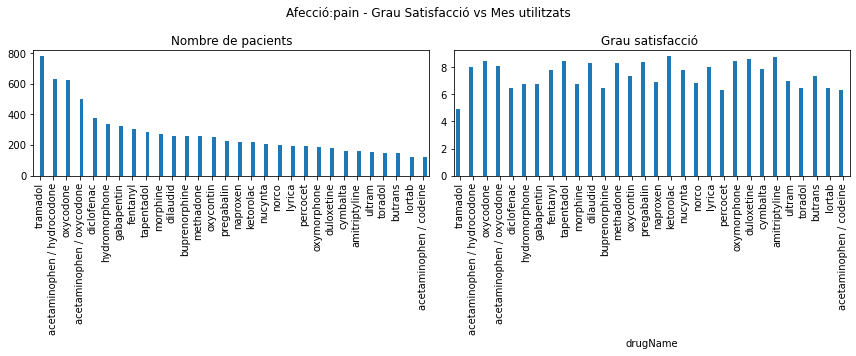

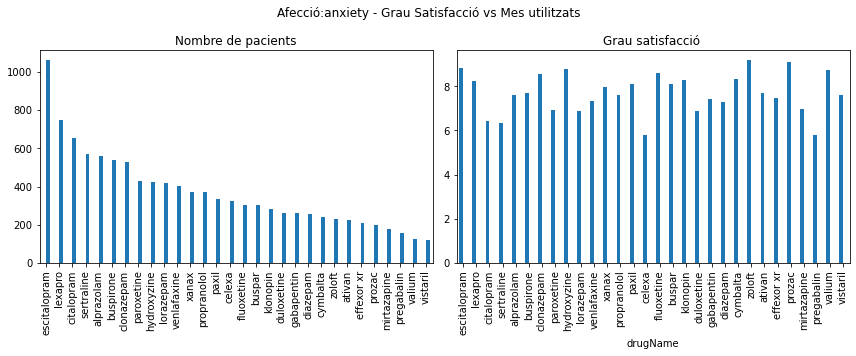

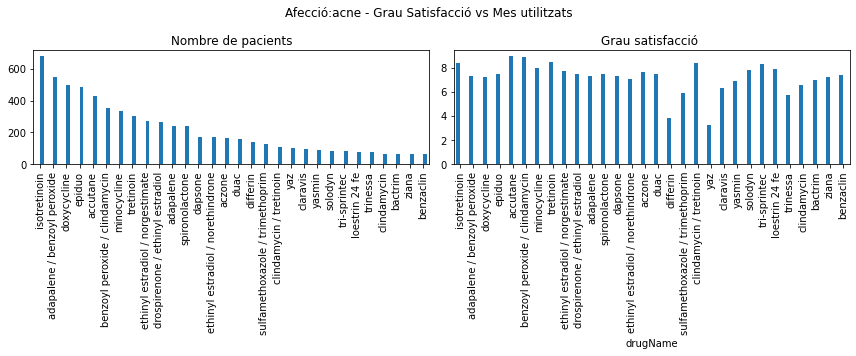

In [241]:
medicamentRatingvsUsat('cap')

<AxesSubplot:xlabel='month', ylabel='casos'>

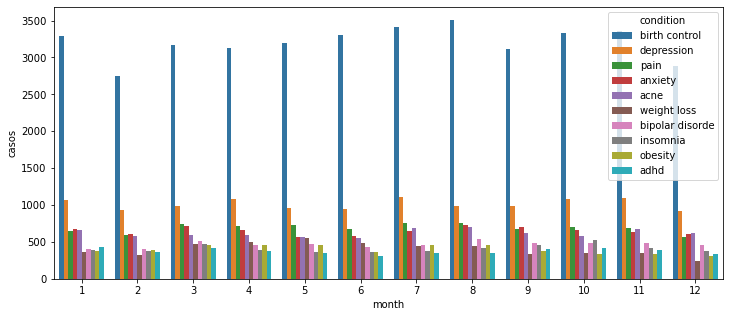

In [335]:
#Nombre de casos per mer
top10Afecccions=farmacsReviewAllDf['condition'].value_counts().head(10)
conditionRankMes= (farmacsReviewAllDf[farmacsReviewAllDf.condition.isin(top10Afecccions.index)]
  .groupby(["month","condition"])
  .agg(casos=("review", "count"))
  .sort_values('casos',ascending=False)
  .reset_index())

plt.figure(figsize=(12,5)) 
sns.barplot(x="month", 
           y="casos", 
           hue="condition", 
           data=conditionRankMes) 

## Analis de sentiments

**** Fen un analisi de sentiments , importem lses llibrries ***

In [195]:
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk import sentiment
analitzador = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [196]:
import snowballstemmer



In [197]:
stemmer = snowballstemmer.stemmer('english');
def revisa_review_paraules(raw_review):
    reviewLletres  = re.sub('[^a-zA-Z]', ' ', raw_review)
    reviewParaules = reviewLletres.lower().split()
    reviewParaulesClau = [w for w in reviewParaules if not w in stopWords]
    reviewParaulesClauSteam = [stemmer.stemWord(w) for w in reviewParaulesClau]
    return( ' '.join(reviewParaulesClauSteam))

In [198]:
farmacsReviewAllDf['reviewNeta'] = farmacsReviewAllDf['review'].apply(revisa_review_paraules)

In [199]:
farmacsReviewAllDf

,uniqueID,drugName,condition,review,rating,date,usefulCount,trainTest,day,month,year,reviewNeta
112607,170298,quetiapine,generalized anxiety disorde,""" please tell the ones who is suffering fr...",10,2016-07-25,45,True,25,7,2016,pleas tell one suffer anxieti use lavend chamo...
201840,162616,rifaximin,irritable bowel syndrome,""" I am a mother of a young adult female. Ov...",10,2017-07-06,3,False,6,7,2017,mother young adult femal year ago daughter hea...
182203,5258,zonisamide,seizures,""" This drug made me angry to the point that...",3,2017-10-09,1,False,9,10,2017,drug made angri point could use normal laid ba...
122328,124923,allopurinol,gout,""" 300 mg and colcris to reduce anything the m...",3,2017-02-18,10,True,18,2,2017,mg colcri reduc anyth might happen miracl drug...
200632,127676,phentermine,weight loss,""" A previous poster Ryan Smith said &quot;I&#...",10,2017-04-16,20,False,16,4,2017,previous poster ryan smith said quot seen revi...
...,...,...,...,...,...,...,...,...,...,...,...,...
82148,163364,methylphenidate,adhd,"""І am a 28 year old female with ADD and mild f...",9,2017-11-15,6,True,15,11,2017,year old femal add mild form narcolepsi concer...
29201,157540,accutane,acne,"""​Hello everyone, I&#039;m your typical 18 ...",10,2017-01-17,34,True,17,1,2017,hello everyon typic year old lad never written...
201369,136917,isotretinoin,acne,"""​Hello everyone, I&#039;m your typical 18 ...",10,2017-01-17,34,False,17,1,2017,hello everyon typic year old lad never written...
86737,155791,cialis,erectile dysfunction,"""❤️❤️❤️ Cialis for US!! I wish I had my hus...",10,2017-08-07,12,True,7,8,2017,ciali us wish husband start decad ago


In [209]:
comp=[]

for fila in farmacsReviewAllDf.itertuples():
    fraseSent = analitzador.polarity_scores(fila.reviewNeta)
    comp.append(fraseSent['compound'])
   
        

In [210]:
farmacsReviewAllDf['sentiment_Rev']=comp

In [211]:
def ratingEtiquetaf(rating):
    if rating < 2:
        etiqueta = 'Molt negativa'
    elif rating < 4:
        etiqueta = 'Negativa'
    elif rating < 6:
        etiqueta = 'Neutral'
    elif rating < 8:
        etiqueta = 'Positiva'
    else:
        rating = 'Molt Positiva'
    return etiqueta

In [212]:

def sentimentEtiquetaf(rating):
    if rating < -0.6:
        etiqueta = 'Molt negativa'
    elif rating < -0.2:
        etiqueta = 'Negativa'
    elif rating < 0.2:
        etiqueta = 'Neutral'
    elif rating < 0.6:
        etiqueta = 'Positiva'
    else:
        etiqueta = 'Molt Positiva'
    return etiqueta




In [213]:
farmacsReviewAllDf['sentimentEtiqueta'] = farmacsReviewAllDf['sentiment_Rev'].apply(sentimentEtiquetaf)
farmacsReviewAllDf['ratingEtiqueta'] = farmacsReviewAllDf['rating'].apply(ratingEtiquetaf)

* ***Gràfica d'analisis de sentiments i correlacions amb rating***

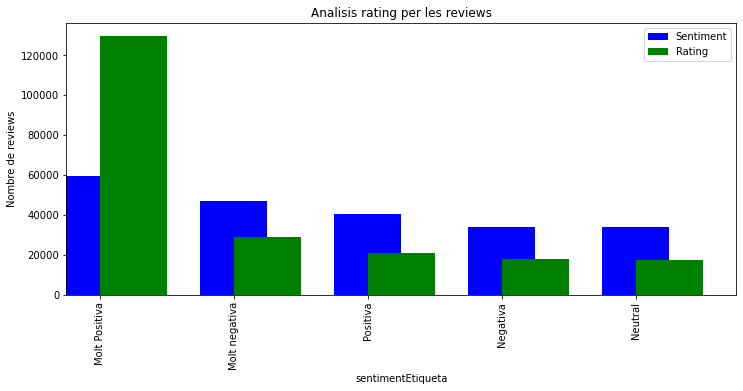

In [214]:

fig,ax=plt.subplots(figsize = (12,5))


farmacsReviewAllDf.sentimentEtiqueta.value_counts().plot(ax=ax,kind='bar',color = 'blue',align='center')
farmacsReviewAllDf.ratingEtiqueta.value_counts().plot(ax=ax,kind='bar',color = 'green',align='edge')
plt.xlabel('sentimentEtiqueta')
plt.ylabel('Nombre de reviews')
plt.title('Analisis rating per les reviews')
plt.legend(['Sentiment','Rating'])
plt.show()

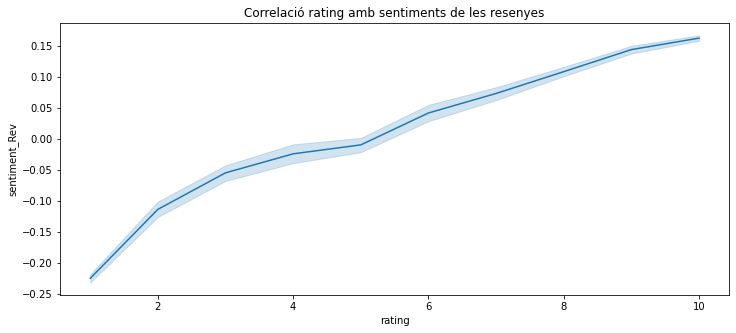

In [215]:
plt.figure(figsize=(12,5)) 
plt.title('Correlació rating amb sentiments de les resenyes')
sns.lineplot(data=farmacsReviewAllDf,x='rating',y='sentiment_Rev')
plt.show()

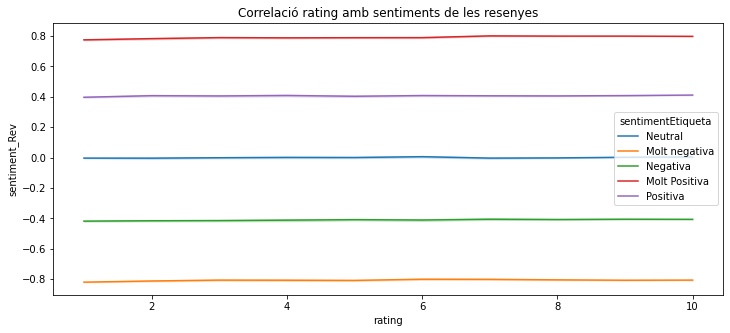

In [216]:
# C  btween rating and sentiment
plt.figure(figsize=(12,5)) 
plt.title('Correlació rating amb sentiments de les resenyes') 
sns.lineplot(data=farmacsReviewAllDf,x='rating',y='sentiment_Rev',hue='sentimentEtiqueta')
plt.show()

## Validacio creuada diversos models per predir la condition a partir de les resenyes



* Es tracta de peparar un moldel que es pugui predir una afecció a partir d'una review.
* Com hem vist  hi ha una quantitat d'afeccions que tenen molt poques reviews, la mediana es 13 , per tant hauriem de descartar les afección amb molt poques review 
* Per el nostre model seleccionarem nomes les afeccions que en el subconjunt de train tinguin 30 o mes reviews
* Posteriorment descartarem de congun de test les afeccion que estiguin en test pero no en train






In [200]:
# Importem les llibreries dels models que utilitzarem
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


***Filtrarem aquelles afeccions que tinguin mes de 90 reviews al conjun d'entrenament i que a més a més existeixin al conjunt de test***

In [242]:
conditionRankInTrain= (farmacsReviewAllDf[farmacsReviewAllDf.trainTest==True]
  .groupby("condition")
  .agg(frequency=("condition", "count"))
  .sort_values('frequency',ascending=False)
  .reset_index())

In [243]:
conditionInTest= (farmacsReviewAllDf[farmacsReviewAllDf.trainTest==False & (farmacsReviewAllDf.condition!='no diagnosticat')]['condition'].unique())

In [244]:
def conditionInTestFunc(condition,listCond):
    if condition in listCond:
        return True
    return False

In [248]:
conditionsTrainG25=conditionRankInTrain[conditionRankInTrain.frequency>90]['condition']

In [252]:

conditionsTrainG25Final=[condition for condition in conditionsTrainG25 if conditionInTestFunc(condition,conditionInTest)][:50]

In [253]:
len(conditionsTrainG25Final)

50

* Definim les vcariables depenents i independents depenentsel conjunt de entrenament independents test

In [254]:
XTrain=farmacsReviewAllDf[(farmacsReviewAllDf.trainTest==True) & (farmacsReviewAllDf.condition.isin(conditionsTrainG25Final))]['reviewNeta']
YTrain=farmacsReviewAllDf[(farmacsReviewAllDf.trainTest==True) & (farmacsReviewAllDf.condition.isin(conditionsTrainG25Final))]['condition']
XTest =farmacsReviewAllDf[(farmacsReviewAllDf.trainTest==False) & (farmacsReviewAllDf.condition.isin(conditionsTrainG25Final))]['reviewNeta']
YTest =farmacsReviewAllDf[(farmacsReviewAllDf.trainTest==False) & (farmacsReviewAllDf.condition.isin(conditionsTrainG25Final))]['condition']


In [255]:
#Creem un objecte Count Vectoritzer i transformem el conjunt de test

In [256]:
countVect = CountVectorizer(ngram_range=(1,2))
XTrainCountVec = countVect.fit_transform(XTrain)

In [257]:
#Anem a fer una validació creuada amb diferents models de classificació

* ***MultinomialNB***

In [258]:
resultatMNB = cross_val_score(MultinomialNB(), XTrainCountVec, YTrain, cv=4, scoring='accuracy')

print ("Exactitud del model MultinomialNB : %.2f (+/- %.2f)" %(resultatMNB.mean(), resultatMNB.std()))

Exactitud del model MultinomialNB : 0.50 (+/- 0.00)


* ***SGDClassifier***

In [259]:
resultatSGDC = cross_val_score(SGDClassifier(loss="modified_huber"), XTrainCountVec, YTrain, cv=4, scoring='accuracy')

print ("Exactitud del model SGDClassifier : %.2f (+/- %.2f)" %(resultatSGDC.mean(), resultatSGDC.std()))

Exactitud del model SGDClassifier : 0.68 (+/- 0.03)


* ***KNeighbors***

In [262]:
resultatKN = cross_val_score(KNeighborsClassifier(n_neighbors=5), XTrainCountVec, YTrain, cv=4, scoring='accuracy')

print ("Exactitud del model KNeighborsClassifier : %.2f (+/- %.2f)" %(resultatKN.mean(), resultatKN.std()))

Exactitud del model KNeighborsClassifier : 0.23 (+/- 0.02)


* ***RandomForest (Atencio!! No fem el random forest perque malgrat hem reduit la mostra la màquina no te capacitat per calcular-lo***

In [ ]:
#resultatRF = cross_val_score(RandomForestClassifier(n_estimators=75), XTrainCountVec, YTrain, cv=4, scoring='accuracy')

#print ("Exactitud del model MultinomialNB : %.2f (+/- %.2f)" %(resultatRF.mean(), resultatRF.std()))

* Entrenament amb el sdg

In [ ]:
# training amb el SDG sobre el conjunt d'entrenament complert
sdgClass = SGDClassifier(loss="modified_huber")
sdgClass.fit(XTrainCountVec, YTrain)



In [337]:
print("Exactitud de les dades de entrenament: ", sdgClass.score(XTrainCountVec, YTrain))

Exactitud de les dades de entrenament:  0.9701968450316057


In [301]:
# Transformem i vectoritzwm
XTestCountVec = countVect.transform(XTest)

In [302]:
# Generem prediccions
prediccioSdg = sdgClass.predict(XTestCountVec)

In [ ]:
sdgClass.

In [303]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("Exactitud de les dades de prova: ", accuracy_score(YTest, 
                                                prediccioSdg))
print("Resultat de Macro F-1 a les dades de prova: ", f1_score(YTest, 
                                                prediccioSdg, average="macro"))
print("Resultat de Micro F-1 a les dades de prova: ", f1_score(YTest, 
                                                prediccioSdg, average="micro"))

Exactitud de les dades de prova:  0.8455249466541993
Resultat de Macro F-1 a les dades de prova:  0.8266113591995884
Resultat de Micro F-1 a les dades de prova:  0.8455249466541993


In [281]:
# Pendent d'implementar completament
def demanaDades(afeccions):
    test_stmt = []
    test_stmt.append(afeccions)
    XTesting = countVect.transform(test_stmt)
    prediccio = sdgClass.predict(XTesting)
    print(prediccio)

def demanaAfeccions():
    # Iterem 
    while True:
        afeccions = input("Entreu els seus simptomes en Anglés, FF per acabar:")
        if afeccions.lower() == "ff":
            break
        resposta = demanaDades(afeccions)
        if resposta is None:
            resposta = 'No podem conclure cap diagnóstic, torna a entrar els simptomes'
        print('Recomanació: ', resposta)

  


In [ ]:
demanaAfeccions()